<a href="https://colab.research.google.com/github/Clarke-Henshaw-Miles/extra/blob/master/GW%20PROJECT/ReadingInHDF5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Installing Packages
! pip install -q bilby==2.2.2 matplotlib==3.7.3 dynesty==2.1.2 corner==2.2.2 gwpy==3.0.8 lalsuite==7.21 scipy==1.13.0 h5py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 940.1/940.1 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━

In [3]:
# Suppressing Specific Warnings
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
# Importing Important Libraries
import lal
from lal import LIGOTimeGPS
import h5py
import numpy as np
import matplotlib.pyplot as plt
import bilby
from bilby.core.prior import Uniform, PowerLaw
from bilby.gw.conversion import convert_to_lal_binary_black_hole_parameters, generate_all_bbh_parameters
from gwpy.timeseries import TimeSeries
import pandas as pd
import corner

In [4]:
#Reading In The File (I had to download the hdf5 file and upload it into python to be able to read it in)
f = h5py.File("/content/posterior_samples(1).h5", 'r')
print(f"There are these keys in the file:{list(f.keys())}")

There are these keys in the file:['history', 'online', 'version']


In [5]:
# Seperating The Seperate Keys Of The File: 'history' 'online' 'version'
hist = f['history']
onl = f['online']
ver = f['version']
print(f"The history key contains these datasets:{list(hist.keys())}")
print(f"The online key contains these datasets:{list(onl.keys())}")
print(f"The version key contains these datasets:{list(ver.keys())}")

The history key contains these datasets:['command_line', 'creator', 'gps_creation_time', 'program', 'webpage_url']
The online key contains these datasets:['approximant', 'calibration_envelope', 'config_file', 'description', 'injection_data', 'meta_data', 'posterior_samples', 'priors', 'psds', 'version']
The version key contains these datasets:['environment', 'manager', 'packages', 'pesummary']


In [6]:
# Defining Some Key Datasets Within The Data (Only the posterior one is important for this)
creation_time = hist['gps_creation_time']
approximant = onl['approximant']
posterior = onl['posterior_samples']
prior = onl['priors']

In [7]:
# Opening The Posterior Samples Dataset
print(posterior.dtype.names)
samples=pd.DataFrame.from_records(np.array(posterior))
samples

('H1_log_likelihood', 'H1_matched_filter_snr', 'H1_optimal_snr', 'H1_time', 'L1_log_likelihood', 'L1_matched_filter_snr', 'L1_optimal_snr', 'V1_log_likelihood', 'V1_matched_filter_snr', 'V1_optimal_snr', 'a_1', 'a_2', 'azimuth', 'chi_1_in_plane', 'chi_2_in_plane', 'chi_eff', 'chi_p', 'chirp_mass', 'chirp_mass_source', 'comoving_distance', 'cos_tilt_1', 'cos_tilt_2', 'dec', 'geocent_time', 'iota', 'log_likelihood', 'log_prior', 'luminosity_distance', 'mass_1', 'mass_1_source', 'mass_2', 'mass_2_source', 'mass_ratio', 'phase', 'phi_1', 'phi_12', 'phi_2', 'phi_jl', 'psi', 'ra', 'recalib_H1_amplitude_0', 'recalib_H1_amplitude_1', 'recalib_H1_amplitude_2', 'recalib_H1_amplitude_3', 'recalib_H1_amplitude_4', 'recalib_H1_amplitude_5', 'recalib_H1_amplitude_6', 'recalib_H1_amplitude_7', 'recalib_H1_amplitude_8', 'recalib_H1_amplitude_9', 'recalib_H1_frequency_0', 'recalib_H1_frequency_1', 'recalib_H1_frequency_2', 'recalib_H1_frequency_3', 'recalib_H1_frequency_4', 'recalib_H1_frequency_5', 'r

,H1_log_likelihood,H1_matched_filter_snr,H1_optimal_snr,H1_time,L1_log_likelihood,L1_matched_filter_snr,L1_optimal_snr,V1_log_likelihood,V1_matched_filter_snr,V1_optimal_snr,...,network_optimal_snr,network_matched_filter_snr,network_21_multipole_snr,network_33_multipole_snr,network_44_multipole_snr,network_precessing_snr,cos_theta_jn,viewing_angle,cos_iota,redshift
0,8.414165,5.117876,4.478704,1.415278e+09,12.484743,4.593115,5.527636,0.608640,3.252488,1.274098,...,7.227508,7.257620,0.223979,1.049796,0.464226,2.429747,-0.248456,1.319711,-0.259965,0.141590
1,17.075793,6.338148,7.557569,1.415278e+09,17.155215,6.896725,5.944629,0.333185,2.329453,1.969369,...,9.814982,9.524930,0.098929,0.676145,0.222189,1.138825,-0.752703,0.718638,-0.778959,0.183557
2,19.656524,7.045211,6.050957,1.415278e+09,15.134612,6.435322,4.581733,0.199582,1.205071,1.708784,...,7.779865,9.534150,0.170034,0.466204,0.082623,0.809032,-0.909872,0.427820,-0.912637,0.238591
3,19.916554,7.010481,5.546025,1.415278e+09,19.297176,7.049054,6.853043,0.171642,0.386408,1.621046,...,8.963837,9.796491,0.105397,0.333449,0.041244,0.372636,-0.976798,0.215836,-0.960297,0.182970
4,16.718270,6.743142,6.977928,1.415278e+09,19.066924,7.257362,6.769090,0.085216,0.032782,1.536098,...,9.842340,9.777071,0.800012,1.953083,0.711553,2.103582,-0.288348,1.278295,-0.299580,0.101379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7656,22.629030,7.905286,7.098369,1.415278e+09,21.204500,7.704103,6.903998,0.076939,1.978432,1.848813,...,10.073239,11.214020,0.247174,0.422726,0.420471,1.956224,-0.347753,1.215623,-0.172573,0.094201
7657,23.915395,7.970667,7.477642,1.415278e+09,20.777520,7.522017,6.588044,0.104749,2.027161,2.008492,...,10.166194,11.137769,0.036995,0.057160,0.335322,1.628699,-0.583764,0.947439,-0.394372,0.122755
7658,22.079511,7.692621,8.070562,1.415278e+09,21.232789,7.707797,6.532638,0.298846,2.687919,2.414142,...,10.660085,11.156106,0.031220,0.050516,0.412580,1.698445,-0.403120,1.155872,-0.284423,0.095427
7659,22.577554,7.889907,7.630979,1.415278e+09,20.903379,7.724801,6.970431,0.076698,2.127775,2.188989,...,10.564584,11.236655,0.617917,0.170934,0.449423,1.556925,-0.246363,1.321870,-0.059540,0.081652


Mc = 11.270621465299595 with a 90% C.I = 11.082175948546414 -> 11.465678692423413


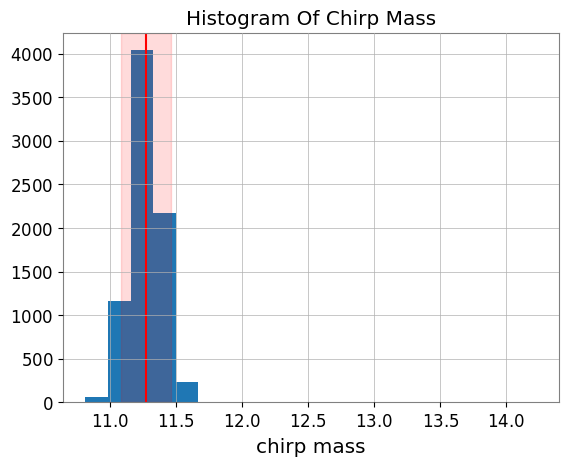

In [8]:
# Chirp Mass
Mc = posterior["chirp_mass"]
lower_bound = np.quantile(Mc, 0.05)
upper_bound = np.quantile(Mc, 0.95)
median = np.quantile(Mc, 0.5)
print("Mc = {} with a 90% C.I = {} -> {}".format(median, lower_bound, upper_bound))

fig, ax = plt.subplots()
ax.hist(posterior["chirp_mass"], bins=20)
ax.axvspan(lower_bound, upper_bound, color='red', alpha=0.14)
ax.axvline(median, color='red')
ax.set_xlabel("chirp mass")
ax.set_title("Histogram Of Chirp Mass")
plt.show()

Chi = -0.3957108807247701 with a 90% C.I = -0.5452570579023025 -> -0.13046888912666038


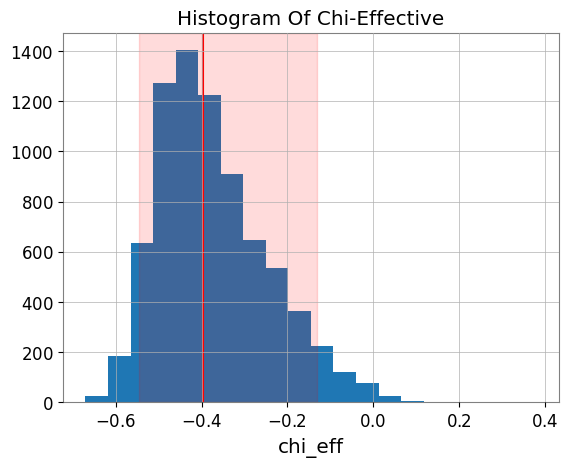

In [9]:
# Chi_Effective Mass
Chi = posterior["chi_eff"]
lower_bound = np.quantile(Chi, 0.05)
upper_bound = np.quantile(Chi, 0.95)
median = np.quantile(Chi, 0.5)
print("Chi = {} with a 90% C.I = {} -> {}".format(median, lower_bound, upper_bound))

fig, ax = plt.subplots()
ax.hist(posterior["chi_eff"], bins=20)
ax.axvspan(lower_bound, upper_bound, color='red', alpha=0.14)
ax.axvline(median, color='red')
ax.set_xlabel("chi_eff")
ax.set_title("Histogram Of Chi-Effective")
plt.show()

https://ldas-jobs.ligo.caltech.edu/~pe.o4/O4b//S241101ee/online/summary/html/online_online_chirp_mass.html

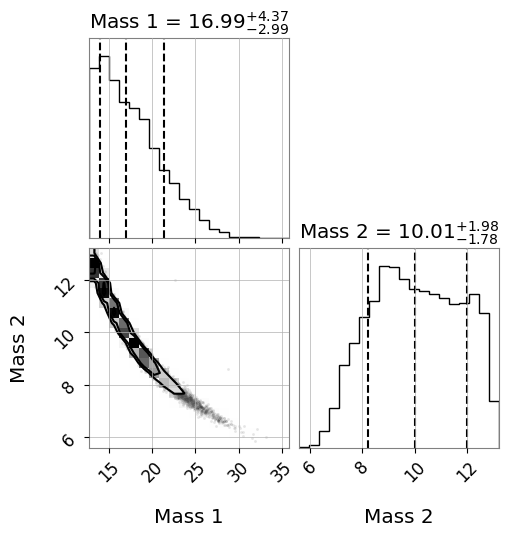

In [10]:
import corner
samples = np.array([posterior["mass_1"], posterior["mass_2"]]).T
fig = corner.corner(samples, bins=20, labels=["Mass 1", "Mass 2"], show_titles=True, quantiles=[0.16, 0.5, 0.84],)